HELLO,

I'LL USE THIS NOTEBOOK TO HONE MY DATA SCIENCE SKILLS. THE MAIN OBJECTIVE HERE IS TO MODEL A RANDOM FOREST MODEL BASED ON A CAR-TESTS DATABASE. I'LL START IMPORTING AND TRANSFORMING THE DATA, THEN PROCEED TO A EXPLORATORY ANALYSIS AND, FOR LAST, CREATING THE RANDOM FOREST MODEL.

HOPE YOU'LL ENJOY!!

In [40]:
##Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
##ignore warnings
warnings.filterwarnings('ignore')
##sql in pandas
from pandasql import sqldf

import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



In [41]:
##Importing dataframes

print('First of all, let''s import our df:\n')

df = pd.read_csv('car_evaluation.csv',encoding='utf-8', sep=',', header=0)

##Let's also add some column names to our dataset

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

display(df.head())

First of all, lets import our df:



,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


NOW THAT WE HAVE OUR DATABASE, WE CAN MAKE AN EXPLORATORY ANALYSIS IN ORDER TO BETTER UNDERSTAND THE DATA.

In [42]:
##First, let's display a summary for each column

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

print('First, let''s display a summary for each column:\n\n')
for col in col_names:
    
    print(df[col].value_counts(),'\n') 

First, lets display a summary for each column:


buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 

doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 

persons
4       576
more    576
2       575
Name: count, dtype: int64 

lug_boot
med      576
big      576
small    575
Name: count, dtype: int64 

safety
med     576
high    576
low     575
Name: count, dtype: int64 

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 



Now Id like to make a graphic for each collumn in order to understand the quantity of each value for each column.

We can see that, except for the class column, we have evenly distributed values.



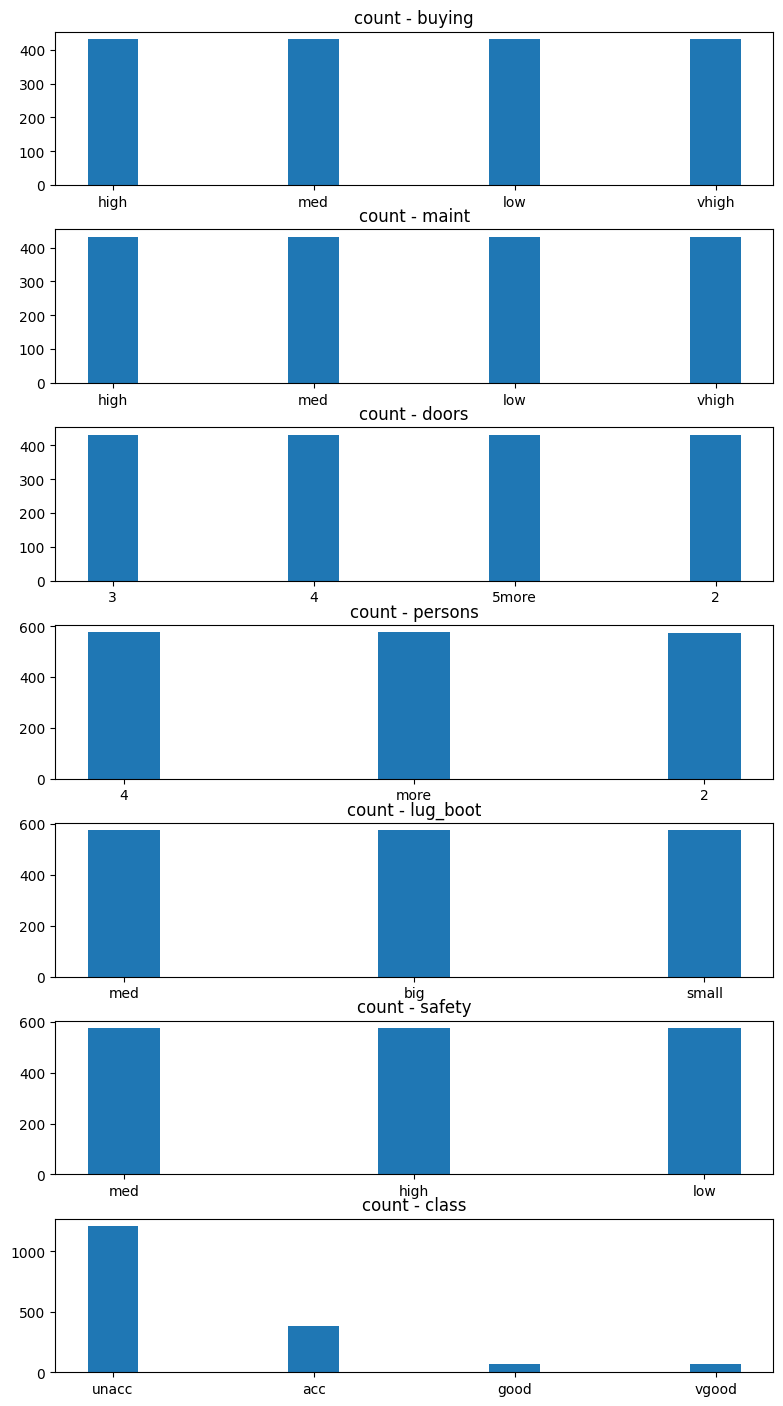

In [43]:
##We can also print some graphics

print('Now I''d like to make a graphic for each collumn in order to understand the quantity of each value for each column.\n')
print('We can see that, except for the ''class'' column, we have evenly distributed values.\n')

n = len(col_names)
fig, ax = plt.subplots(n,1,figsize=(8,2*n))
fig.tight_layout()
width = 0.5
cont = 0

for col in col_names:
    
    x = np.arange(len(df[col].value_counts().tolist()))
    
    ax[cont].bar(x, df[col].value_counts().tolist(), width/2)
    ax[cont].set_xticks(x, df[col].value_counts().keys().tolist(), rotation ='horizontal')
    ax[cont].set_title('count - '+col)

    cont = cont+1
    

In [44]:
##Now let's check for null values

display(df.isnull().sum())

print('\nWe can see that there are no null values.')

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


We can see that there are no null values.


OK! NOW THAT WE HAVE EXPLORED OUR DATA, LET'S PROCEED WITH THE MODELING.

--> RANDOM FOREST MODEL:

In [45]:
##Dividing our df into dependent and independent variables

X = df.drop(['class'], axis=1)

y = df['class']

In [46]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

##Let's also check the chape of our sets
print('X_train: {:.02f} , {:.02f}'.format(X_train.shape[0],X_train.shape[1]))
print('X_test: {:.02f} , {:.02f}'.format(X_test.shape[0],X_test.shape[1]))

X_train: 1157.00 , 6.00
X_test: 570.00 , 6.00


In [47]:
# Ok, now let's encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

display(X_test.head())

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


With our train and test datasets defined, we can create our random forest classifier object!

In [48]:
#Let's create and train our model, then predict the results

# instantiate the classifier 

rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

In [49]:
##With our predictions, we can test our accuracy score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9474


In [50]:
##For comparison, let's create a forest with 100 trees

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9649


We can see that increasing the tree number in our forest can improve our accuracy, but it comes at the cost of more calculations and increase of computational cost.

Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy.

Lets plot our feature scores so we can see the ones that have the most influence in our model.



safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64



We can also add a viz to better understand the data.



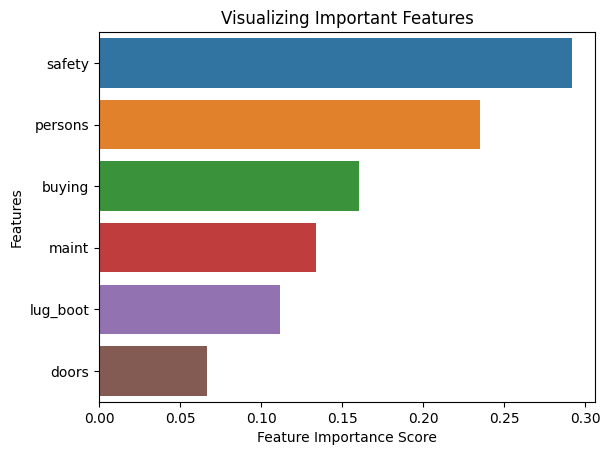

In [51]:

##First of all, let's display our feature importance classification for the 100 tree model

feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print('Let''s plot our feature scores so we can see the ones that have the most influence in our model.\n')

display(feature_scores)

print('\n\nWe can also add a viz to better understand the data.\n')

##We can also create a visualization in order to better see the info

# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

Now, I will drop the two least important features, doors and lug_boot, from the model, rebuild the model and check its effect on accuracy.

In [52]:
# dCreating dependent and independent variables

X = df.drop(['class', 'doors', 'lug_boot'], axis=1)

y = df['class']

In [53]:
##Creating train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [54]:
# encoding variables

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'safety'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [55]:
##Now let's create our new model


clf = RandomForestClassifier(random_state=0)


# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print('\n We can see here that the model''s accuracy has dropped significantly just by dropping the two least influential variables from the analysis.')

print('\nThis is an interesting point to consider, since dropping variables also implies less computational cost to our model. In real cases, a balance between computational cost and performance must be found for each case.')


Model accuracy score with doors variable removed : 0.8614

 We can see here that the models accuracy has dropped significantly just by dropping the two least influential variables from the analysis.

This is an interesting point to consider, since dropping variables also implies less computational cost to our model. In real cases, a balance between computational cost and performance must be found for each case.


18. Confusion matrix 


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

These four outcomes are summarized in a confusion matrix given below.

In [56]:
## For last, let's make a confusion matrix to our model, so we can summarize it's performance

# Print the Confusion Matrix and slice it into four pieces


cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\n\n We can see above that the results in the diagonal are the true positives, which the model guessed correctly.')
print('\nThe values outside the matrix diagonal are the ones guessed incorrectly. Those are the false positives and false negatives.')

Confusion matrix

 [[ 86  10  23   8]
 [  1   7   0  10]
 [ 15   1 383   0]
 [  5   6   0  15]]


 We can see above that the results in the diagonal are the true positives, which the model guessed correctly.

The values outside the matrix diagonal are the ones guessed incorrectly. Those are the false positives and false negatives.


In [57]:
##For last, let's create a classification report, se we can see more metrics about our model performance

print('Accuracy Report:\n\n')

print(classification_report(y_test, y_pred))


print('\n\n We can see that even for the case with less variables we still have a good accuracy (0,8), which suggests we have a good model.')
print('\n\n We also have a 0,68 for the recall value, which means that of all the true positive values, 68% were actually identified by the model.')


Accuracy Report:


              precision    recall  f1-score   support

         acc       0.80      0.68      0.74       127
        good       0.29      0.39      0.33        18
       unacc       0.94      0.96      0.95       399
       vgood       0.45      0.58      0.51        26

    accuracy                           0.86       570
   macro avg       0.62      0.65      0.63       570
weighted avg       0.87      0.86      0.86       570



 We can see that even for the case with less variables we still have a good accuracy (0,8), which suggests we have a good model.


 We also have a 0,68 for the recall value, which means that of all the true positive values, 68% were actually identified by the model.
